# GRIPS SPARK FOUNDATION INTERNSHIP - May'2021

### Author :  Vishwanath M
#### Problem : Predict the percentage of an student based on the no. of study hours.

In [2]:
##Importing important libraries---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
##importing Dataset-
path =  "http://bit.ly/w-data"
Data = pd.read_csv(path)
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
## Now print the first 10 records...
Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
##Now print the last 10 records...
Data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#We use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Let's print the full summary of the dataframe .
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
# No null values observed
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
##importing libraries for plotting Graphs
import seaborn as sns

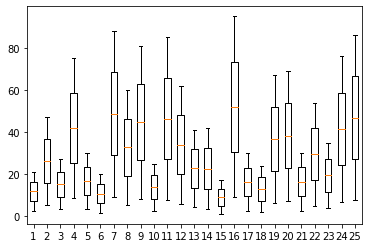

In [9]:
plt.boxplot(Data)
plt.show()

## Visualizing Data.

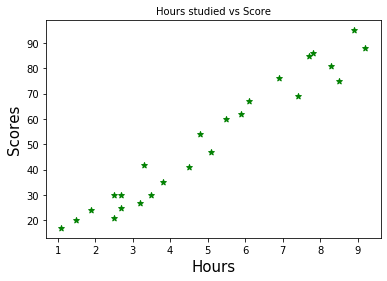

In [54]:
##ploting Scatter plot----
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(Data.Hours,Data.Scores,color='Green',marker='*')
plt.show()

## The plot indicates a linear curve saying the number of hours studied is directly proportional to score secured

In [13]:
X = Data.iloc[:,:-1].values
Y = Data.iloc[:,1].values

## Preparing Data and splitting into train and test sets.

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.3)

In [40]:
## We have Splitted Our Data Using 70:30 Rule
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)


X train.shape = (17, 1)
Y train.shape = (17,)
X test.shape  = (8, 1)
Y test.shape  = (8,)


## Training the Model.

In [41]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [42]:
##Fitting Training Data
linreg.fit(X_train,Y_train)

LinearRegression()

In [43]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.370815382341881 
B1 = [9.78856669]


In [44]:
##plotting the REGRESSION LINE---
Y0 = linreg.intercept_ + linreg.coef_*X_train
Y0

array([[69.91192552],
       [13.13823874],
       [52.29250548],
       [77.74277887],
       [34.67308545],
       [83.61591888],
       [92.4256289 ],
       [62.08107217],
       [36.63079879],
       [28.79994544],
       [56.20793216],
       [28.79994544],
       [85.57363222],
       [26.8422321 ],
       [49.35593548],
       [89.48905889],
       [46.41936547]])

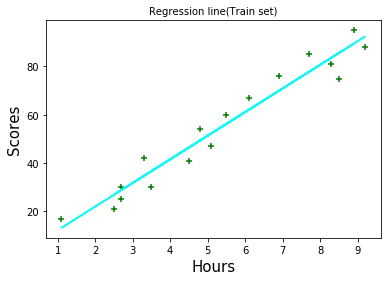

In [56]:
##plotting on train data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y0,color='cyan')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

## Test Data.

In [46]:
Y_pred=linreg.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [47]:
#now print the Y_test.
Y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

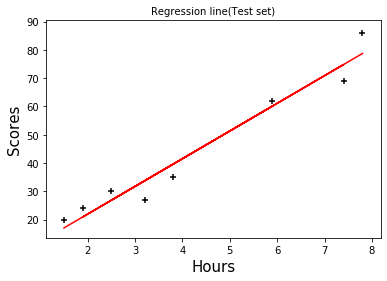

In [48]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## Comparing Actual vs Predicted Scores.¶

In [49]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## ACCURACY OF THE MODEL¶

In [50]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)##Goodness of fit Test

0.9568211104435257

## Above 95.68% percentage indicates that above fitted Model is a GOOD MODEL. 

## Predicting the Error

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  22.96509721270043
Root Mean Squared Error =  4.792191274636315
Mean Absolute Error     =  4.792191274636315


## Predicting the score¶

In [53]:
Prediction_score = linreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [92.91505723]


## CONCLUSION: 

### From the above result we can say that if a studied for 9.25 then student will secured 92.91 MARKS.